---

_You are currently looking at **version 1.1** of this notebook. To download notebooks and datafiles, as well as get help on Jupyter notebooks in the Coursera platform, visit the [Jupyter Notebook FAQ](https://www.coursera.org/learn/python-machine-learning/resources/bANLa) course resource._

---

# Applied Machine Learning: Unsupervised Learning

## Preamble and Datasets

Unsupervised Learning involves tasks that operate on datasets **without** labeled responses or target values. Instead the goal is to capture interesting structure or information.

#### Applications of unsupervised learning
* Visualize structure of a complex dataset.
* Density estimation to predict probabilities of events.
* Compress and summarize the data.
* Extract features for supervised learning.
* Discover important clusters or outliers.

#### Two major Unsupervised Learning methods
* **Transformations**
    * Processes that extract or compute information.
* **Clustering**
    * Find groups in the data.
    * Assign every point in the dataset to one of the groups.

In [16]:
%matplotlib inline

import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer

# Breast cancer dataset
cancer = load_breast_cancer()
(X_cancer, y_cancer) = load_breast_cancer(return_X_y = True)

# Our sample fruits dataset
fruits = pd.read_table('../datasets/fruit_data_with_colors.txt')
X_fruits = fruits[['mass','width','height', 'color_score']]
y_fruits = fruits[['fruit_label']] - 1

---
## Dimensionality Reduction and Manifold Learning
* Finds an approximate version of the dataset using fewer features. 
* Used for exploring and visualizing a dataset to understand grouping or relationships.
* Often visualized using a 2-dimensional scatter plot. 
* Also used for compression, finding features for supervised learning

### Principal Components Analysis (PCA)

Take the cloud of original data points and finds a rotation of it. So the dimensions are statistically uncorrelated. PCA then typically drops all but the most informative initial dimensions that capture most of the variation in the original dataset. 

#### Using PCA to find the first two principal components of the breast cancer dataset

In [17]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
(X_cancer, y_cancer) = load_breast_cancer(return_X_y = True)

# Before applying PCA, each feature should be centered (zero mean) and with unit variance
X_normalized = StandardScaler().fit(X_cancer).transform(X_cancer)  

pca = PCA(n_components = 2).fit(X_normalized)

X_pca = pca.transform(X_normalized)
print(X_cancer.shape, X_pca.shape)

(569, 30) (569, 2)


#### Plotting the PCA-transformed version of the breast cancer dataset

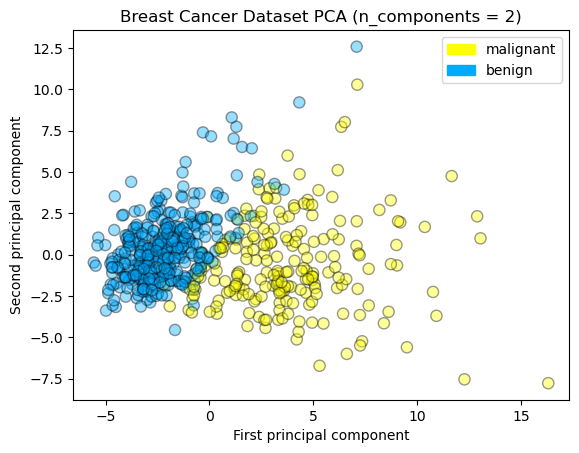

In [18]:
from adspy_shared_utilities import plot_labelled_scatter

plot_labelled_scatter(X_pca, y_cancer, ['malignant', 'benign'], show=False)

plt.xlabel('First principal component')
plt.ylabel('Second principal component')
plt.title('Breast Cancer Dataset PCA (n_components = 2)')

plt.show()

#### Plotting the magnitude of each feature value for the first two principal components

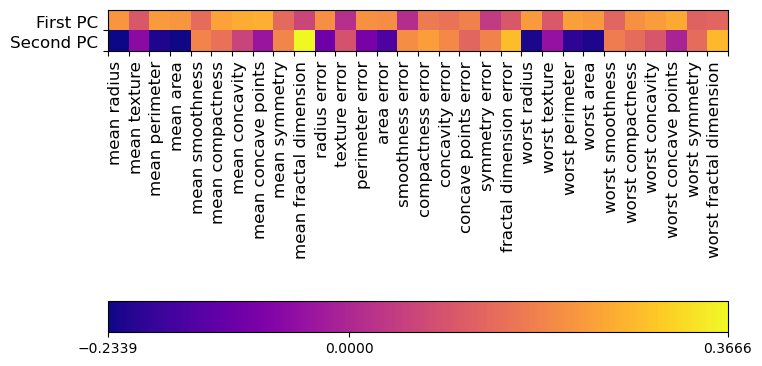

In [19]:
fig = plt.figure(figsize=(8, 5))
plt.imshow(pca.components_, interpolation = 'none', cmap = 'plasma')
feature_names = list(cancer.feature_names)

plt.gca().set_xticks(np.arange(-.5, len(feature_names)))
plt.gca().set_yticks(np.arange(0.5, 2))
plt.gca().set_xticklabels(feature_names+[""], rotation=90, ha='left', fontsize=12)
plt.gca().set_yticklabels(['First PC', 'Second PC'], va='bottom', fontsize=12)

plt.colorbar(orientation='horizontal', ticks=[pca.components_.min(), 0, pca.components_.max()], pad=0.65)

#### PCA on the fruit dataset (for comparison)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


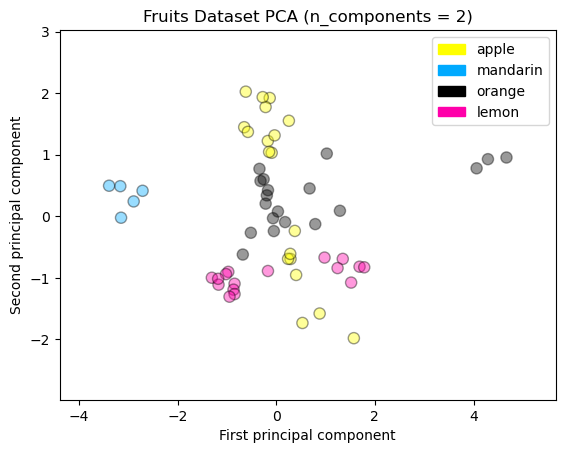

In [20]:
%load_ext autoreload
%autoreload 2

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# each feature should be centered (zero mean) and with unit variance
X_normalized = StandardScaler().fit(X_fruits).transform(X_fruits)  

pca = PCA(n_components = 2).fit(X_normalized)
X_pca = pca.transform(X_normalized)

from adspy_shared_utilities import plot_labelled_scatter
plot_labelled_scatter(X_pca, y_fruits, ['apple','mandarin','orange','lemon'], show=False)

plt.xlabel('First principal component')
plt.ylabel('Second principal component')
plt.title('Fruits Dataset PCA (n_components = 2)')

plt.show()

### Manifold learning methods

#### Multidimensional scaling (MDS) on the fruit dataset

/home/user/.application-data/miniconda3/envs/data-science/lib/python3.11/site-packages/sklearn/manifold/_mds.py:299: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


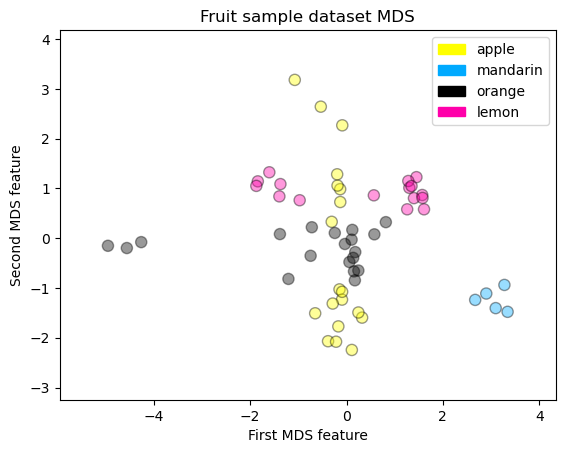

In [21]:
from adspy_shared_utilities import plot_labelled_scatter
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import MDS

# each feature should be centered (zero mean) and with unit variance
X_fruits_normalized = StandardScaler().fit(X_fruits).transform(X_fruits)  

mds = MDS(n_components = 2)

X_fruits_mds = mds.fit_transform(X_fruits_normalized)

plot_labelled_scatter(X_fruits_mds, y_fruits, ['apple', 'mandarin', 'orange', 'lemon'], show=False)
plt.xlabel('First MDS feature')
plt.ylabel('Second MDS feature')
plt.title('Fruit sample dataset MDS')

plt.show()

#### Multidimensional scaling (MDS) on the breast cancer dataset

(This example is not covered in the lecture video, but is included here so you can compare it to the results from PCA.)

/home/user/.application-data/miniconda3/envs/data-science/lib/python3.11/site-packages/sklearn/manifold/_mds.py:299: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


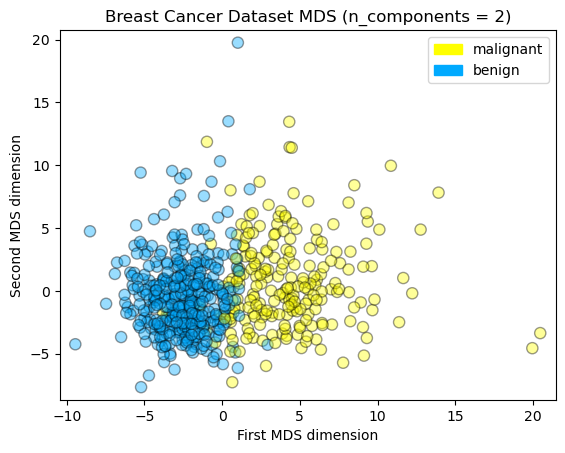

In [22]:
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import MDS
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
(X_cancer, y_cancer) = load_breast_cancer(return_X_y = True)

# each feature should be centered (zero mean) and with unit variance
X_normalized = StandardScaler().fit(X_cancer).transform(X_cancer)  

mds = MDS(n_components = 2)

X_mds = mds.fit_transform(X_normalized)

from adspy_shared_utilities import plot_labelled_scatter
plot_labelled_scatter(X_mds, y_cancer, ['malignant', 'benign'], show=False)

plt.xlabel('First MDS dimension')
plt.ylabel('Second MDS dimension')
plt.title('Breast Cancer Dataset MDS (n_components = 2)')

plt.show()

#### t-SNE on the fruit dataset

(This example from the lecture video is included so that you can see how some dimensionality reduction methods may be less successful on some datasets. Here, it doesn't work as well at finding structure in the small fruits dataset, compared to other methods like MDS.)

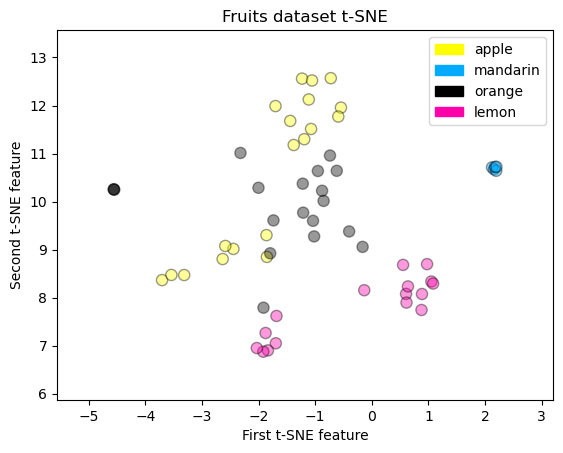

In [23]:
from sklearn.manifold import TSNE

tsne = TSNE(random_state = 0)

X_tsne = tsne.fit_transform(X_fruits_normalized)

plot_labelled_scatter(X_tsne, y_fruits, ['apple', 'mandarin', 'orange', 'lemon'], show=False)
plt.xlabel('First t-SNE feature')
plt.ylabel('Second t-SNE feature')
plt.title('Fruits dataset t-SNE')

plt.show()

#### t-SNE on the breast cancer dataset

**t-SNE**: a powerful manifold learning method that finds a 2D projection preserving information about neighbors.

Although not shown in the lecture video, this example is included for comparison, showing the results of running t-SNE on the breast cancer dataset.  See the reading "How to Use t-SNE effectively" for further details on how the visualizations from t-SNE are affected by specific parameter settings.

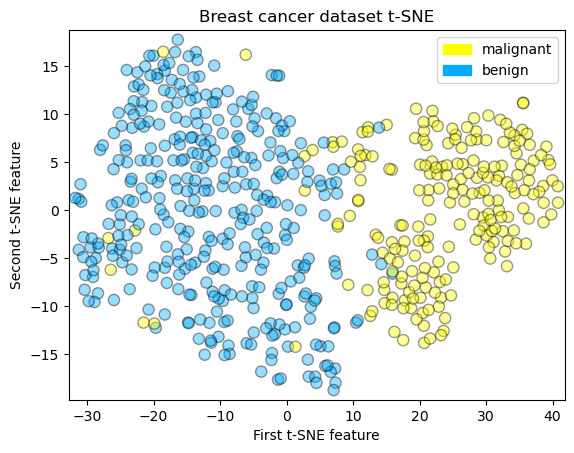

In [24]:
tsne = TSNE(random_state = 0)

X_tsne = tsne.fit_transform(X_normalized)

plot_labelled_scatter(X_tsne, y_cancer, ['malignant', 'benign'], show=False)
plt.xlabel('First t-SNE feature')
plt.ylabel('Second t-SNE feature')
plt.title('Breast cancer dataset t-SNE')

plt.show()

## Clustering

Finding a way to divide a dataset into groups (clusters).

* Data points within the same cluster should be 'close' or 'similar' in some way.
* Data points in different clusters should be 'far apart' or 'different'.
* Clustering algorithms output a cluster membership index for each data point:
    * Hard clustering: each data point belongs to exactly one cluster.
    * Soft (or fuzzy) clustering: each data point is assigned a weight, score, or probability of membership for each cluster.

### K-means

* **Initialization**: Pick the number of clusters k you want to find. Then pick k random points to serve as an initial guess for the cluster centers.
* **Step A**: Assign each data point to the nearest cluster center.
* **Step B**: Update each cluster by replacing it with the mean of all points assigned to that cluster (in step A).
* **Repeat**: Repeat steps A and B until the centers converge to a stable solution.

##### Limitations of K-means
* Work well for simle clusters that are same size, well-separated, globular shapes.
* Does not do well with irregular, complex clusters.
* Variants of k-means like k-medoids can work with categorical features.

This example from the lecture video creates an artificial dataset with make_blobs, then applies k-means to find 3 clusters, and plots the points in each cluster identified by a corresponding color.

/home/user/.application-data/miniconda3/envs/data-science/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


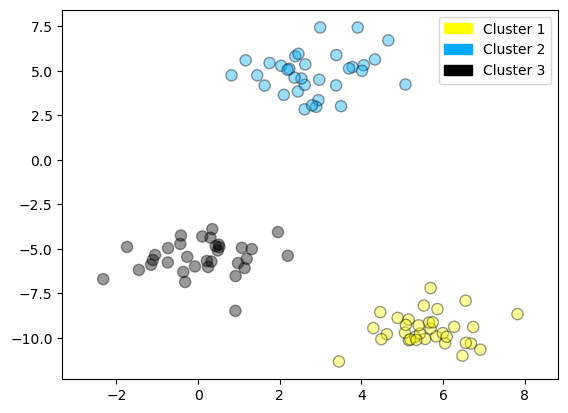

In [25]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from adspy_shared_utilities import plot_labelled_scatter

X, y = make_blobs(random_state = 10)

kmeans = KMeans(n_clusters = 3)
kmeans.fit(X)

plot_labelled_scatter(X, kmeans.labels_, ['Cluster 1', 'Cluster 2', 'Cluster 3'])


Example showing k-means used to find 4 clusters in the fruits dataset.  Note that in general, it's important to scale the individual features before applying k-means clustering.

/home/user/.application-data/miniconda3/envs/data-science/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


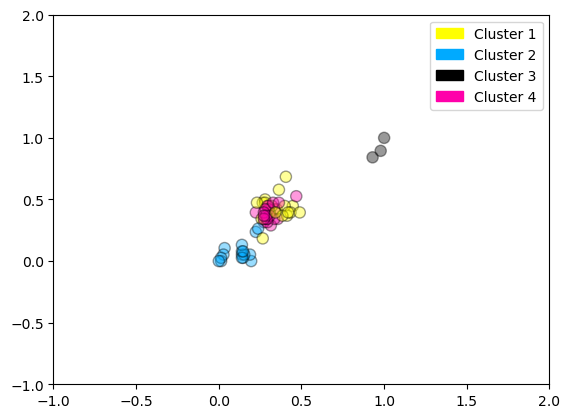

In [26]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from adspy_shared_utilities import plot_labelled_scatter
from sklearn.preprocessing import MinMaxScaler

fruits = pd.read_table('../datasets/fruit_data_with_colors.txt')
X_fruits = fruits[['mass','width','height', 'color_score']].values
y_fruits = fruits[['fruit_label']] - 1

X_fruits_normalized = MinMaxScaler().fit(X_fruits).transform(X_fruits)  

kmeans = KMeans(n_clusters=4, random_state=0)
kmeans.fit(X_fruits_normalized)

plot_labelled_scatter(X_fruits_normalized, kmeans.labels_, ['Cluster 1', 'Cluster 2', 'Cluster 3', 'Cluster 4'])

### Agglomerative clustering

Agglomerative clustering refers to a family of clustering methods that work by doing an iterative bottom up approach. First, each data point is put into its own cluster of one item. Then, a sequence of clusterings are done where the most similar two clusters at each stage are merged into a new cluster. Then, this process is repeated until some stopping condition is met (e.g. the number of clusters). 

##### Linkage Criteria for Agglomerative Clustering (criteria for merging clusters)
* **Ward's method**: Least increase in total variance (around cluster centroids).
* **Average link**: Average distance between clusters.
* **Complete linkage**: Max distance between clusters.

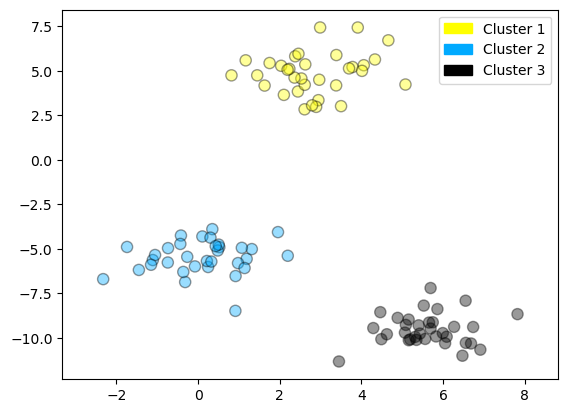

In [27]:
from sklearn.datasets import make_blobs
from sklearn.cluster import AgglomerativeClustering
from adspy_shared_utilities import plot_labelled_scatter

X, y = make_blobs(random_state = 10)

cls = AgglomerativeClustering(n_clusters=3)
cls_assignment = cls.fit_predict(X)

plot_labelled_scatter(X, cls_assignment, ['Cluster 1', 'Cluster 2', 'Cluster 3'])

#### Creating a dendrogram (using scipy)

This dendrogram plot is based on the dataset created in the previous step with make_blobs, but for clarity, only 10 samples have been selected for this example, as plotted here:

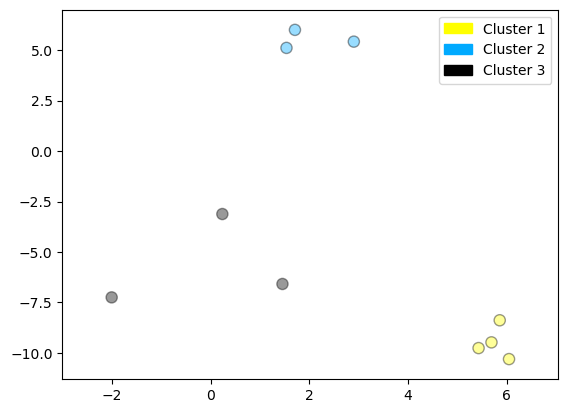

[[  5.69192445  -9.47641249]
 [  1.70789903   6.00435173]
 [  0.23621041  -3.11909976]
 [  2.90159483   5.42121526]
 [  5.85943906  -8.38192364]
 [  6.04774884 -10.30504657]
 [ -2.00758803  -7.24743939]
 [  1.45467725  -6.58387198]
 [  1.53636249   5.11121453]
 [  5.4307043   -9.75956122]]


In [28]:
X, y = make_blobs(random_state = 10, n_samples = 10)
plot_labelled_scatter(X, y, ['Cluster 1', 'Cluster 2', 'Cluster 3'])
print(X)

And here's the dendrogram corresponding to agglomerative clustering of the 10 points above using Ward's method.  The index 0..9 of the points corresponds to the index of the points in the X array above.  For example, point 0 (5.69, -9.47) and point 9 (5.43, -9.76) are the closest two points and are clustered first.

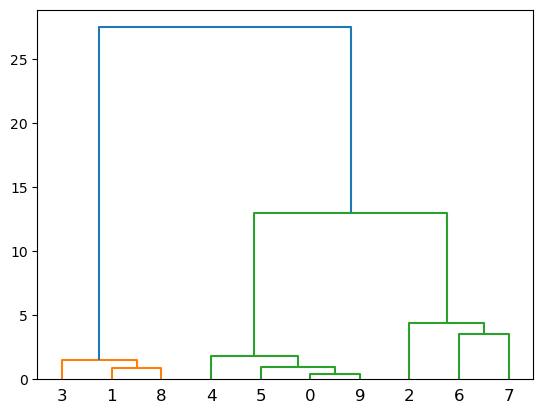

In [29]:
from scipy.cluster.hierarchy import ward, dendrogram
plt.figure()
dendrogram(ward(X))
plt.show()

### DBSCAN (Density-Based Spatial Clustering of Applications with Noise) clustering 


The main idea behind DBSCAN is that clusters represent areas in the data-space that are more dense with data points, while being separated by regions that are empty or at least much less densely populated. The two main parameters for DBSCAN are min samples and eps. All points that lie in a more dense region are called core samples. For a given data point, if there are min sample of other data points that lie within a distance of eps, that given data points is labeled as a core sample. Then, all core samples that are with a distance of eps units apart are put into the same cluster. In addition to points being categorized as core samples, points that don't end up belonging to any cluster are considered as noise. While points that are within a distance of eps units from core points, but not core points themselves, are termed boundary points. 

* Unlike k-means, you don't need to specify the number of clusters.
* Relatively efficient - can be used with large datasets.
* Identify likely noise points.

Cluster membership values:
[ 0  1  0  2  0  0  0  2  2 -1  1  2  0  0 -1  0  0  1 -1  1  1  2  2  2
  1]


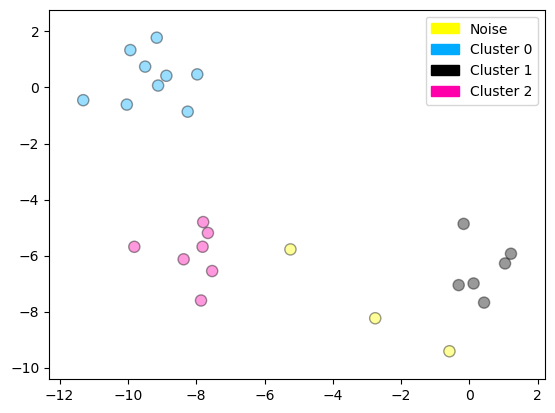

In [30]:
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_blobs

X, y = make_blobs(random_state = 9, n_samples = 25)

dbscan = DBSCAN(eps = 2, min_samples = 2)

cls = dbscan.fit_predict(X)
print("Cluster membership values:\n{}".format(cls))

plot_labelled_scatter(X, cls + 1, ['Noise', 'Cluster 0', 'Cluster 1', 'Cluster 2'])

## Clustering Evaluation
* With ground truth, existing labels can be used to evaluate cluster quality.
* Without ground truth, evaluation can be difficult: multiple clusterings may be plausible for a dataset.
* Consider task-based evaluation: Evaluate clustering according to performance on a task that does have an objective basis for comparison.
* Example: The effectiveness of clustering-based features for a supervised learning task.
* Some evaluation heuristics exists (e.g. silhouette) but those can be unreliable. 